In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA/ML Practical/Day_2/Social_Network_ads.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [5]:
#To check correlation between x as Nominal and y as numeric
#use the  ANOVA test
from scipy.stats import f_oneway
#performing the ANOVA test (analysis of variance)
#Null hypothesis (HO) = there is no correlation between Nominal and continuous variable
#We accept the Assumption(HO) only when P-value > 0.05 else reject

In [6]:
X = df[['Age','Salary']].values
X.shape

y = df['Purchased'].values
y.shape

(284,)

In [7]:
from sklearn.preprocessing import StandardScaler
#std score of sample x is calculates as:
# z= (x-u)/s
#u is mean, s is standard deviation

In [8]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5,:]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:

X_train,X_test,y_train,y_test = train_test_split(X_sc,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
model =GaussianNB()
model.fit(X_train,y_train).score(X_test,y_test)

0.8771929824561403

In [16]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train).score(X_test,y_test)

0.8947368421052632

In [17]:
age = np.arange(X_test[:,0].min()-0.2,X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2,X_test[:,1].max()+0.2,0.01)
Age , Sal  = np.meshgrid(age, sal)
print(Age.shape, Sal.shape)

(408, 424) (408, 424)


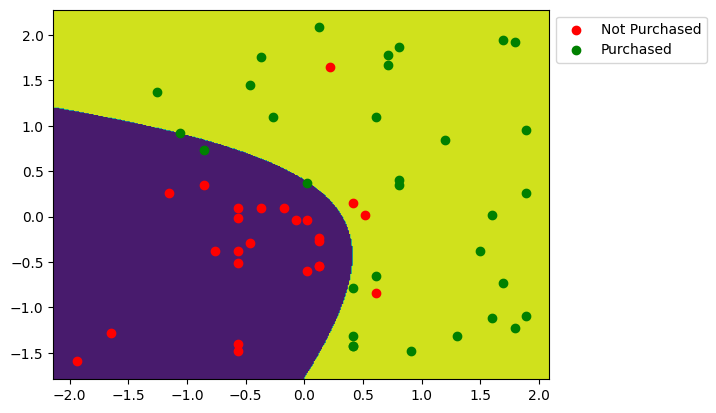

In [18]:
formed_data = np.c_[Age.ravel(),Sal.ravel()]
Z1 = model.predict(formed_data).reshape(Age.shape) 
Z1.shape
plt.contourf(Age, Sal, Z1)
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c = 'r', label ="Not Purchased")  
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c = 'Green', label ="Purchased")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

In [23]:
accuracies= cross_val_score(model,X_train,y_train,cv=5)
print("Average Accuracy =",np.mean(accuracies))

Average Accuracy = 0.8896618357487924


In [24]:
accuracies= cross_val_score(model,X,y,cv=5)
print("Average Accuracy =",np.mean(accuracies))

Average Accuracy = 0.887593984962406
